# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Sawita
- **Email:** dewisawita80@gmail.com
- **ID Dicoding:** Dewi Sawita

## Menentukan Pertanyaan Bisnis

- Bagaimana prediksi jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana prediksi jumlah sewa sepeda berdasarkan hari kerja maupun hari libur?

## Import Semua Packages/Library yang Digunakan

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#memanggil dataset

In [68]:
#memanggil data dari tabel hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
#memanggil data dari tabel day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- menampilkan 5 data teratas dari tabel hour.csv dan tabel day.csv

### Assessing Data

In [ ]:
#informasi dari data hour.csv

In [71]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- memeriksa tipe data dari setiap kolom yang ada pada tabel hour.csv

In [72]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- memeriksa apakah ada data tang memiliki duplikat pada setiap kolom yang ada pada tabel hour.csv

In [13]:
print("Jumlah Duplikasi data: ", hour_df.duplicated().sum())

Jumlah Duplikasi data:  0


**Insight:**
- hour.csv memiliki 0 data duplikasi

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
#informasi data dari day.csv

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
print("Jumlah Duplikasi data: ", day_df.duplicated().sum())

Jumlah Duplikasi data:  0


In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- baik dari file hour.csv maupun day.csv memiliki 0 data duplikasi yang menyatakan bahwa data tersebut bersih dari duplikasi

### Cleaning Data

In [73]:
hour_df.drop_duplicates(inplace=True)

In [74]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [75]:
hour_df[hour_df.season.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [76]:
hour_df.season.value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

**Insight:**
- memeriksa apakah ada data yang memiliki missing value dari hour.csv dan setelah diperiksa tidak ada missing value pada hour.csv

In [77]:
hour_df[hour_df.season == hour_df.season.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6250,6251,2011-09-23,4,0,9,0,0,5,1,2,0.62,0.5455,0.94,0.0896,11,41,52
6251,6252,2011-09-23,4,0,9,1,0,5,1,2,0.60,0.5000,1.00,0.0000,2,29,31
6252,6253,2011-09-23,4,0,9,2,0,5,1,2,0.60,0.5000,1.00,0.1045,6,14,20
6253,6254,2011-09-23,4,0,9,3,0,5,1,2,0.60,0.5000,1.00,0.0000,3,5,8
6254,6255,2011-09-23,4,0,9,4,0,5,1,3,0.60,0.5000,1.00,0.0000,6,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17112,17113,2012-12-20,4,1,12,19,0,4,1,3,0.34,0.3182,0.71,0.2537,3,115,118
17113,17114,2012-12-20,4,1,12,20,0,4,1,3,0.34,0.3333,0.76,0.1642,1,49,50
17114,17115,2012-12-20,4,1,12,21,0,4,1,3,0.34,0.3333,0.76,0.1642,1,25,26
17115,17116,2012-12-20,4,1,12,22,0,4,1,3,0.34,0.3333,0.87,0.1940,1,20,21


In [78]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- memeriksa apakah ada data yang memiliki inaccurate value pada hour.
csv dan setelah diperiksa tidak ada inaccurate value pada hour.csv

In [79]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [81]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- karena file tersebut sudah bersih dari duplikasi, maka pada tahap data cleaning mengubah tipe data kolom dteday yang tadinya bertipe data object menjadi datetime

In [84]:
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

In [82]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Explore Pertanyaan 1

pada tahap ini, kita akan menghitung jumlah pengguna sepeda per musimnya dengan melihat kuantitas penyewa per musim

In [31]:
season_count = hour_df.groupby('season')['cnt'].sum().reset_index()
print(season_count)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


In [33]:
season_count = day_df.groupby('season')['cnt'].sum().reset_index()
print(season_count)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


**Insight:**
- menghitung jumlah pengguna sepeda per musim yang mana setiap musim dideklarasikan menggunakan angka
- dapat diketahui bahwa jumlah penyewa terbanyak yaitu pada musim ketiga sebanyak 1.061.129 penyewa

In [63]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_str'] = hour_df['season'].map(season_map)

**Insight:**
- manambahkan kolom nama musim untuk mengetahui musim tanpa dideklarasikan melalui angka

In [36]:
print(hour_df.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

  season_str  
0     Spring  
1     Spring  
2     Spring  
3     Spring  
4     Spring  


### Explore Pertanyaan 2

pada tahap ini, kita akan menghitung jumlah pengguna sepeda berdasarkan hari kerja dan hari libur untuk membandingkan keduanya

In [47]:
workingday_count = hour_df.groupby('workingday')['cnt'].sum().reset_index()
print(workingday_count)

   workingday      cnt
0           0  1000269
1           1  2292410


In [48]:
workingday_count = day_df.groupby('workingday')['cnt'].sum().reset_index()
print(workingday_count)

   workingday      cnt
0           0  1000269
1           1  2292410


**Insight:**
- menghitung jumlah penyewa sepeda saat hari kerja dan hari libur
- dapat disimpulkan bahwa pada saat hari kerja, penyewa sepeda lebih banyak dibandingkan hari libur yaitu sebanyak 2.292.210 penyewa

## Visualization & Explanatory Analysis

### Pertanyaan 1:

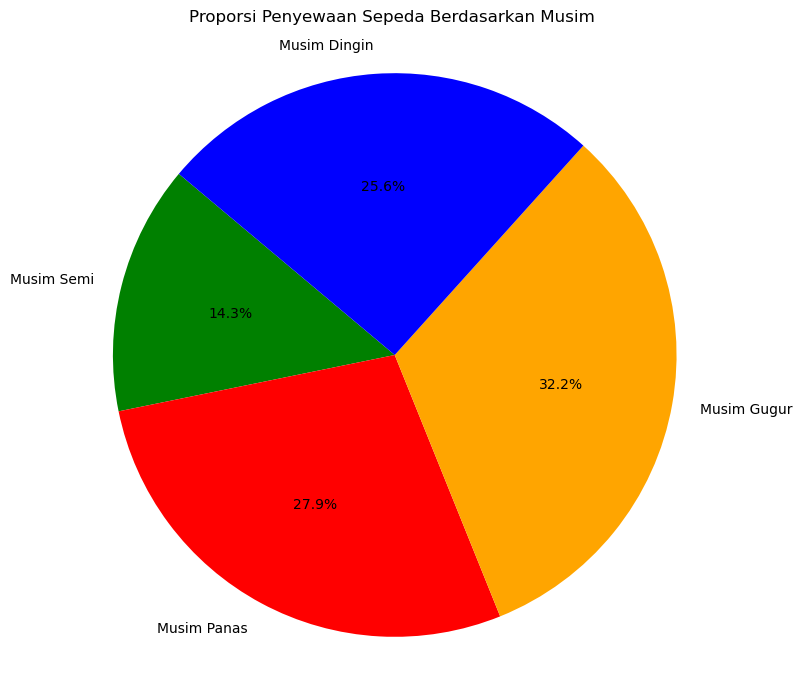

In [45]:
season_count = hour_df.groupby('season')['cnt'].sum().reset_index()
season_count['season'] = season_count['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

colors = ['green', 'red', 'orange', 'blue']  # Musim Semi, Musim Panas, Musim Gugur, Musim Dingin

plt.figure(figsize=(8, 8))
plt.pie(season_count['cnt'], labels=season_count['season'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporsi Penyewaan Sepeda Berdasarkan Musim \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

**Insight:**
Dari pie bar tersebut dapat disimpulkan bahwasanya disaat musim gugur penyewa sepeda lebih banyak dibandingkan musim lainnya

### Pertanyaan 2:

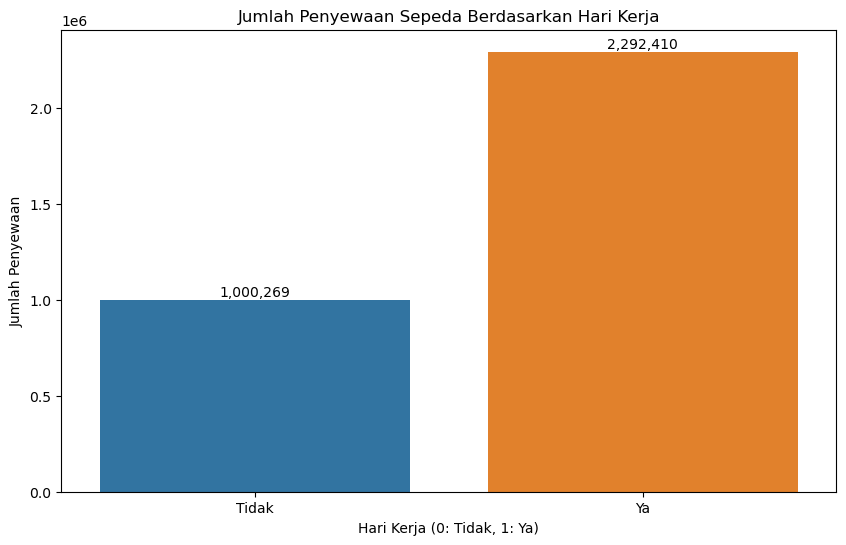

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_count)

for index, row in workingday_count.iterrows():
    plt.text(row.name, row.cnt, f'{row.cnt:,}', color='black', ha='center', va='bottom')

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.show()

**Insight:**
Dari bar chart tersebut dapat disimpulkan bahwa penyewat sepeda lebih banyak saat hari kerja dibandingkan hari libur

## Analisis Lanjutan (Opsional)

In [57]:
# Model regresi untuk memprediksi jumlah penyewaan berdasarkan musim
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = hour_df[['season']]
y = hour_df['cnt']

# Memisahkan data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi
predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results)

       Actual   Predicted
12830     425  205.473913
8688       88  144.764309
7091        4  235.828715
12230     526  175.119111
431        13  144.764309
...       ...         ...
6759       17  235.828715
13989      85  205.473913
173        98  144.764309
16192     266  235.828715
8211      267  235.828715

[3476 rows x 2 columns]


In [60]:
# Model regresi untuk memprediksi jumlah penyewaan berdasarkan hari kerja
X2 = hour_df[['workingday']]
y2 = hour_df['cnt']

# Memisahkan data untuk pelatihan dan pengujian
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Membuat dan melatih model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Memprediksi
predictions2 = model2.predict(X2_test)

results2 = pd.DataFrame({
    'Actual': y2_test,
    'Predicted': predictions2
})

print(results2.head())

       Actual   Predicted
12830     425  183.305499
8688       88  183.305499
7091        4  194.005821
12230     526  194.005821
431        13  194.005821


## Conclusion

- Conclution pertanyaan 1
Kesimpulan dari analisis yang telah dilakukan menghasilkan bahwa saat musim gugur, penyewa sepeda lebih banyak dibandingkan musim lainnya dengan presentasi sebagai berikut:
1. Musim gugur = 32.2%
2. Musim panas = 27.9%
3. Musim dingin = 25.6%
4. Musim Semi = 14.3%
- Conclution pertanyaan 2
Kesimpulan dari analisis yang sudah dilakukan menghasilkan bahwa kebanyakan penyewa sepeda menyewa saat hari kerja dibandingkan hari libur. Adapun hasilnya yaitu:
1. Hari kerja sebanyak 2,292,410 peminjam berdasarkan data
2. Hari libur sebanyak 1,000,269 peminjam berdasarkan data

In [65]:
all_df = pd.concat([hour_df, day_df], ignore_index=True)

In [66]:
all_df.to_csv("all_data.csv", index=False)